In [1]:
import pandas as pd

# Load the datasets into pandas DataFrames
training_data = pd.read_excel('C:/Users/noman/OneDrive/Bureau/Machine_Learning_Project2_DSTI/Project_2/Project_2/asap-aes/training_set_rel3.xls')
validation_data = pd.read_excel('C:/Users/noman/OneDrive/Bureau/Machine_Learning_Project2_DSTI/Project_2/Project_2/asap-aes/valid_set.xls')

# Display the first few rows of each dataset to understand their structure
training_data_head = training_data.head()
validation_data_head = validation_data.head()

training_data_head, validation_data_head


(   essay_id  essay_set                                              essay  \
 0         1          1  Dear local newspaper, I think effects computer...   
 1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
 2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
 3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
 4         5          1  Dear @LOCATION1, I know having computers has a...   
 
    rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
 0             4.0             4.0             NaN            8.0   
 1             5.0             4.0             NaN            9.0   
 2             4.0             3.0             NaN            7.0   
 3             5.0             5.0             NaN           10.0   
 4             4.0             4.0             NaN            8.0   
 
    rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
 0             NaN             NaN       

In [2]:
# Identify missing values in the training and validation data
missing_values_training = training_data.isnull().sum()
missing_values_validation = validation_data.isnull().sum()

# For text preprocessing, let's also showcase an example of how we might clean the special characters from essays
# example of cleaning one of the essays from special characters
example_essay_cleaned = training_data.loc[0, 'essay'].replace('@CAPS1', '').replace('@LOCATION1', '')

missing_values_training, missing_values_validation, example_essay_cleaned[:500]  # Display first 500 characters to check cleaning


(essay_id              0
 essay_set             0
 essay                 0
 rater1_domain1        1
 rater2_domain1        1
 rater3_domain1    12850
 domain1_score         1
 rater1_domain2    11178
 rater2_domain2    11178
 domain2_score     11178
 rater1_trait1     10686
 rater1_trait2     10686
 rater1_trait3     10686
 rater1_trait4     10686
 rater1_trait5     12255
 rater1_trait6     12255
 rater2_trait1     10686
 rater2_trait2     10686
 rater2_trait3     10686
 rater2_trait4     10686
 rater2_trait5     12255
 rater2_trait6     12255
 rater3_trait1     12850
 rater3_trait2     12850
 rater3_trait3     12850
 rater3_trait4     12850
 rater3_trait5     12850
 rater3_trait6     12850
 dtype: int64,
 essay_id                   0
 essay_set                  0
 essay                      0
 domain1_predictionid       0
 domain2_predictionid    3618
 dtype: int64,
 "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us 

In [3]:
# Handling missing values for the analysis - focusing on essential columns for now
# For simplicity, we'll fill missing scores with the median of their respective columns where applicable
# Note: This step might be refined based on specific analysis goals or skipped for columns not used in the analysis

# Fill missing rater scores with median values for training data
for column in ['rater1_domain1', 'rater2_domain1', 'domain1_score']:
    if column in training_data.columns:
        training_data[column].fillna(training_data[column].median(), inplace=True)

# For validation data, there's no action needed based on the initial missing values analysis

# Text cleaning for both datasets
# Define a simple function to clean essay texts
def clean_essay_text(essay):
    # Replace special markers - this can be expanded based on further analysis
    essay = essay.replace('@CAPS', '').replace('@LOCATION', '').replace('@NUM', '').replace('@ORGANIZATION', '')
    # Additional cleaning steps can be added here
    return essay

# Apply text cleaning to all essays in both datasets
training_data['essay'] = training_data['essay'].apply(clean_essay_text)
validation_data['essay'] = validation_data['essay'].apply(clean_essay_text)

# Check the cleaning by displaying the first few rows again
training_data_head_cleaned = training_data.head()
validation_data_head_cleaned = validation_data.head()

training_data_head_cleaned[['essay_id', 'essay_set', 'essay', 'domain1_score']], validation_data_head_cleaned[['essay_id', 'essay_set', 'essay']]


(   essay_id  essay_set                                              essay  \
 0         1          1  Dear local newspaper, I think effects computer...   
 1         2          1  Dear 1 2, I believe that using computers will ...   
 2         3          1  Dear, 1 2 3 More and more people use computers...   
 3         4          1  Dear Local Newspaper, 1 I have found that many...   
 4         5          1  Dear 1, I know having computers has a positive...   
 
    domain1_score  
 0            8.0  
 1            9.0  
 2            7.0  
 3           10.0  
 4            8.0  ,
    essay_id  essay_set                                              essay
 0      1788          1  Dear 1, 1 more and more people start to use co...
 1      1789          1  Dear 1 Time 1 me tell you what I think of comp...
 2      1790          1  Dear Local newspaper, Have you been spending a...
 3      1791          1  Dear Readers, 1 you imagine how life would be ...
 4      1792          1  Dear news

In [4]:
missing_values_training = training_data.isnull().sum()
missing_values_validation = validation_data.isnull().sum()

print(missing_values_training)
print(missing_values_validation)

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12850
domain1_score         0
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64
essay_id                   0
essay_set                  0
essay                      0
domain1_predictionid       0
domain2_predictionid    3618
dtype: int64


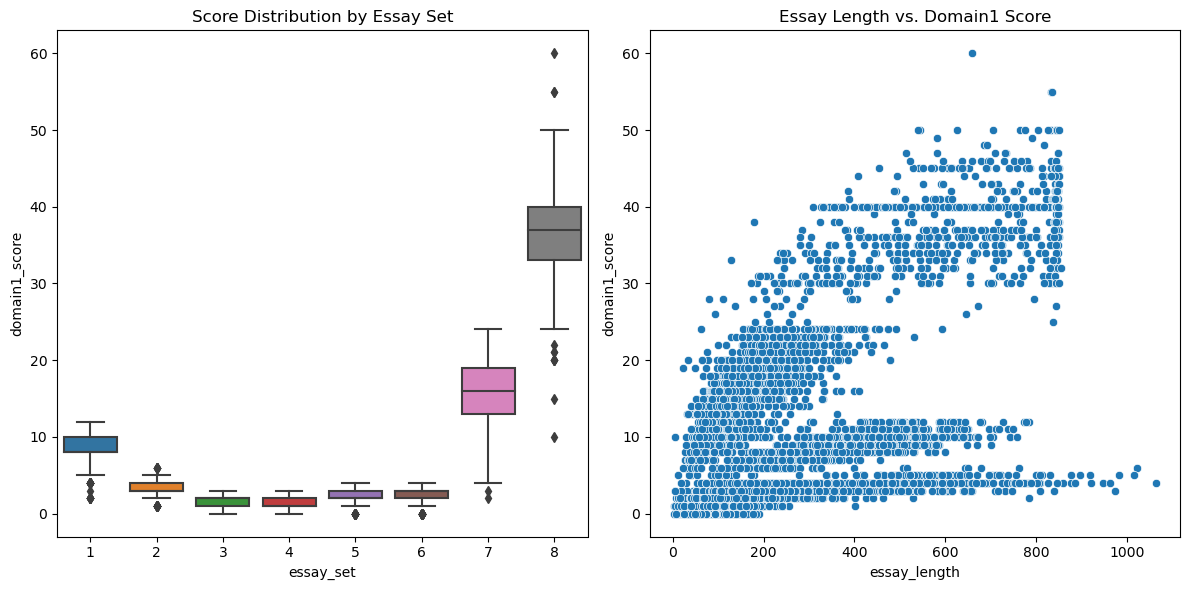

,essay_length,domain1_score
essay_length,1.000000,0.586475
domain1_score,0.586475,1.000000


In [5]:
# Calculate the length of each essay in words
training_data['essay_length'] = training_data['essay'].apply(lambda x: len(x.split()))

# Analyze the relationship between essay length and domain1_score
# We'll use a simple correlation coefficient for this initial analysis
correlation_length_score = training_data[['essay_length', 'domain1_score']].corr()

# Visualize the distribution of scores across different essay sets
# We'll prepare the data for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Score Distribution by Essay Set
plt.subplot(1, 2, 1)
sns.boxplot(x='essay_set', y='domain1_score', data=training_data)
plt.title('Score Distribution by Essay Set')

# Essay Length vs. Domain1 Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='essay_length', y='domain1_score', data=training_data)
plt.title('Essay Length vs. Domain1 Score')

plt.tight_layout()
plt.show()

correlation_length_score


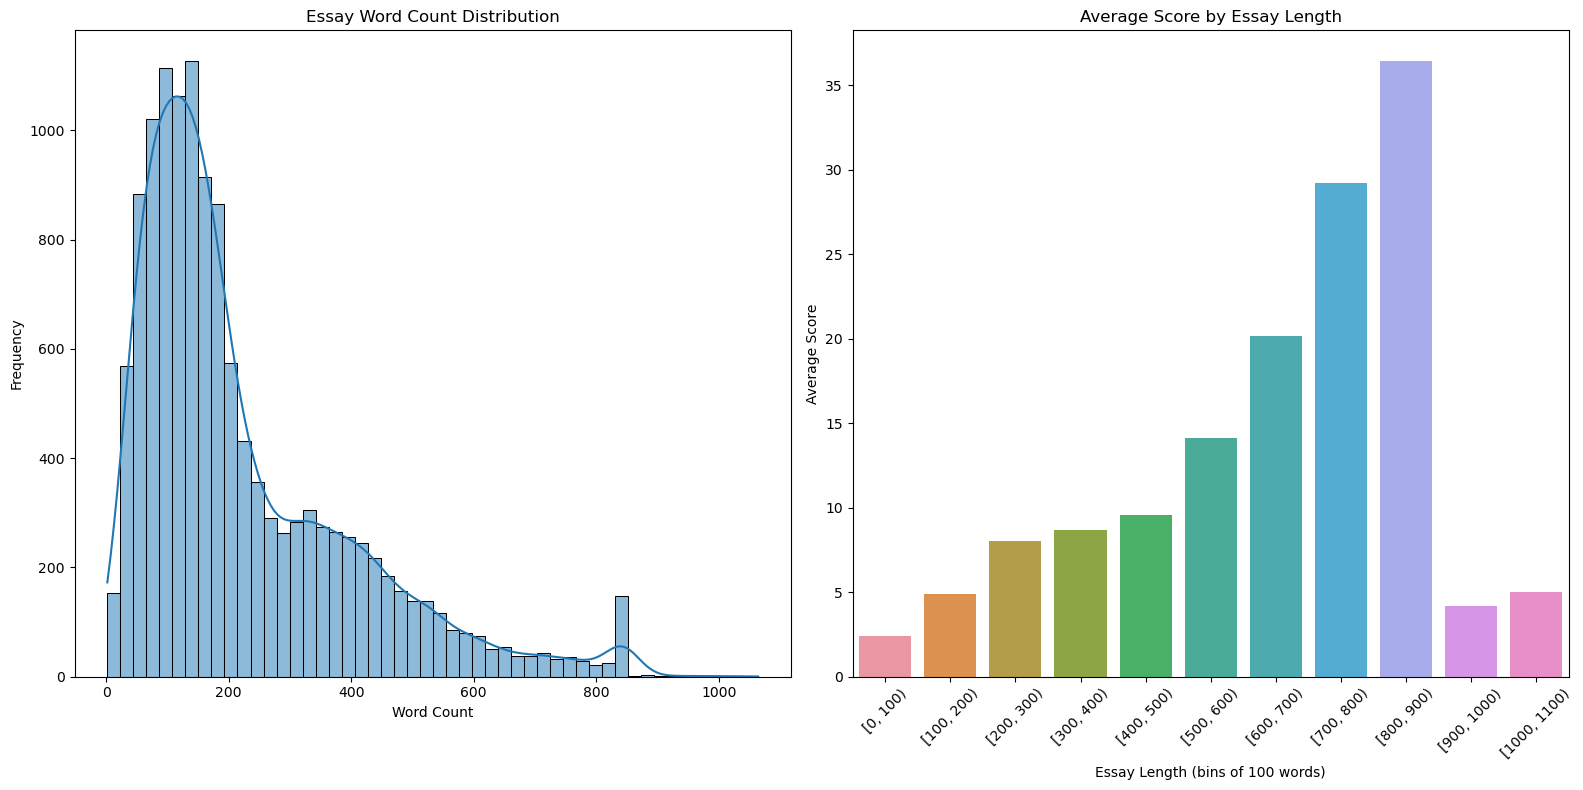

In [6]:
plt.figure(figsize=(16, 8))

# Word Count Distribution
plt.subplot(1, 2, 1)
sns.histplot(training_data['essay_length'], bins=50, kde=True)
plt.title('Essay Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Average Score by Essay Length (in bins of 100 words)
# Creating bins for essay length
training_data['length_bin'] = pd.cut(training_data['essay_length'], bins=range(0, 1200, 100), right=False)
average_scores_by_length = training_data.groupby('length_bin')['domain1_score'].mean().reset_index()

plt.subplot(1, 2, 2)
sns.barplot(x='length_bin', y='domain1_score', data=average_scores_by_length)
plt.xticks(rotation=45)
plt.title('Average Score by Essay Length')
plt.xlabel('Essay Length (bins of 100 words)')
plt.ylabel('Average Score')

plt.tight_layout()
plt.show()


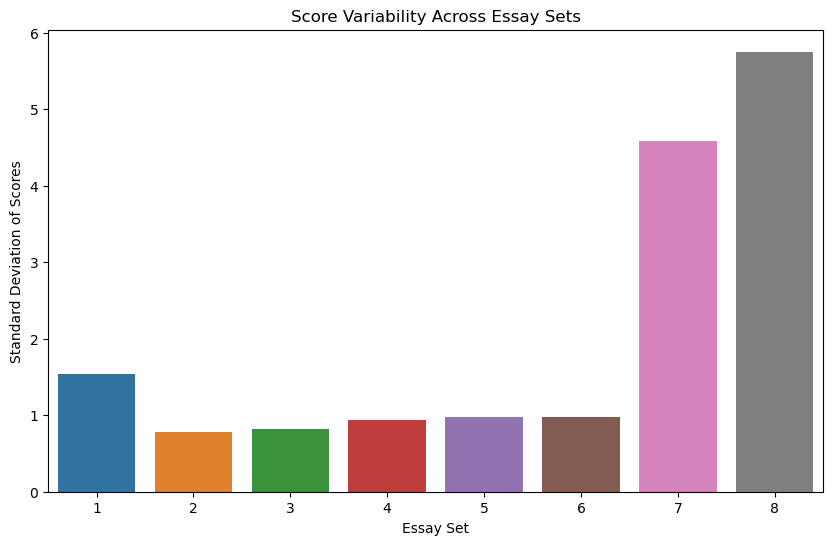

In [7]:
# Calculate the standard deviation of scores within each essay set
score_variability_by_set = training_data.groupby('essay_set')['domain1_score'].std().reset_index()

# Visualize the standard deviation of scores across essay sets
plt.figure(figsize=(10, 6))
sns.barplot(x='essay_set', y='domain1_score', data=score_variability_by_set)
plt.title('Score Variability Across Essay Sets')
plt.xlabel('Essay Set')
plt.ylabel('Standard Deviation of Scores')
plt.show()


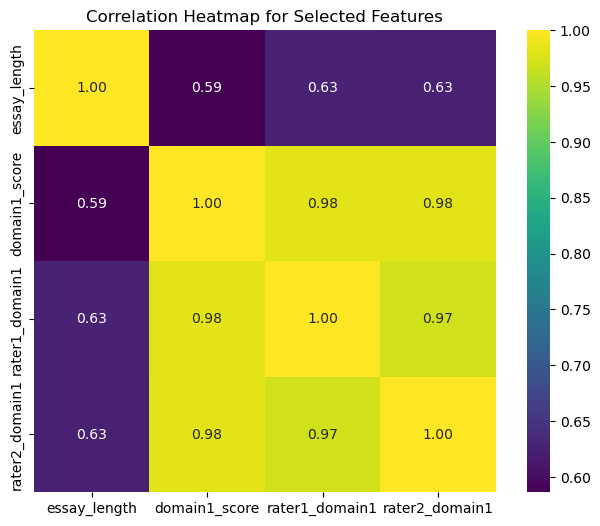

In [8]:
# Recalculating the correlation matrix specifically for the heatmap visualization,
# including only the most relevant features for readability and insight
relevant_features = ['essay_length', 'domain1_score', 'rater1_domain1', 'rater2_domain1']
correlation_matrix_relevant = training_data[relevant_features].corr()

# Plotting the correlation heatmap for the selected relevant features
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_relevant, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Correlation Heatmap for Selected Features')
plt.show()


In [9]:
from sklearn.impute import SimpleImputer

# Initialize the imputer to use the median for imputing missing values
imputer = SimpleImputer(strategy='median')

# Select numerical columns for imputation (excluding identifiers like essay_id and essay_set)
numerical_columns = training_data.select_dtypes(include=['float64', 'int64']).columns.drop(['essay_id', 'essay_set'])

# Apply imputation to the numerical columns in the training data
training_data[numerical_columns] = imputer.fit_transform(training_data[numerical_columns])

# Check if there are any missing values left in these columns
missing_values_after_imputation = training_data[numerical_columns].isnull().sum()

missing_values_after_imputation


rater1_domain1    0
rater2_domain1    0
rater3_domain1    0
domain1_score     0
rater1_domain2    0
rater2_domain2    0
domain2_score     0
rater1_trait1     0
rater1_trait2     0
rater1_trait3     0
rater1_trait4     0
rater1_trait5     0
rater1_trait6     0
rater2_trait1     0
rater2_trait2     0
rater2_trait3     0
rater2_trait4     0
rater2_trait5     0
rater2_trait6     0
rater3_trait1     0
rater3_trait2     0
rater3_trait3     0
rater3_trait4     0
rater3_trait5     0
rater3_trait6     0
essay_length      0
dtype: int64

## Text Analysis

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Initialize NLTK's stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuations, and lemmatize the words
    lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return lemmatized_tokens

# Apply text preprocessing to the essay column
training_data['processed_essay'] = training_data['essay'].apply(preprocess_text)

# Display the first processed essay to verify preprocessing
training_data['processed_essay'].head(1).values[0][:20]  # Display first 20 tokens of the first processed essay


['dear',
 'local',
 'newspaper',
 'think',
 'effect',
 'computer',
 'people',
 'great',
 'learning',
 'give',
 'u',
 'time',
 'chat',
 'people',
 'help',
 'u',
 'learn',
 'globe',
 'astronomy',
 'keep']

In [11]:
# Define functions to calculate the new text features
def word_count(essay):
    return len(essay.split())

def unique_word_count(essay):
    return len(set(essay.split()))

def average_word_length(essay):
    words = essay.split()
    if len(words) == 0:  # Avoid division by zero for any empty essays
        return 0
    return sum(len(word) for word in words) / len(words)

# Apply functions to the dataset
training_data['word_count'] = training_data['essay'].apply(word_count)
training_data['unique_word_count'] = training_data['essay'].apply(unique_word_count)
training_data['average_word_length'] = training_data['essay'].apply(average_word_length)

# Display the first few rows to verify the new features
training_data[['essay', 'word_count', 'unique_word_count', 'average_word_length']].head()


,essay,word_count,unique_word_count,average_word_length
0,"Dear local newspaper, I think effects computer...",338,183,4.443787
1,"Dear 1 2, I believe that using computers will ...",419,215,4.336516
2,"Dear, 1 2 3 More and more people use computers...",279,166,4.390681
3,"Dear Local Newspaper, 1 I have found that many...",524,269,4.677481
4,"Dear 1, I know having computers has a positive...",465,225,4.468817


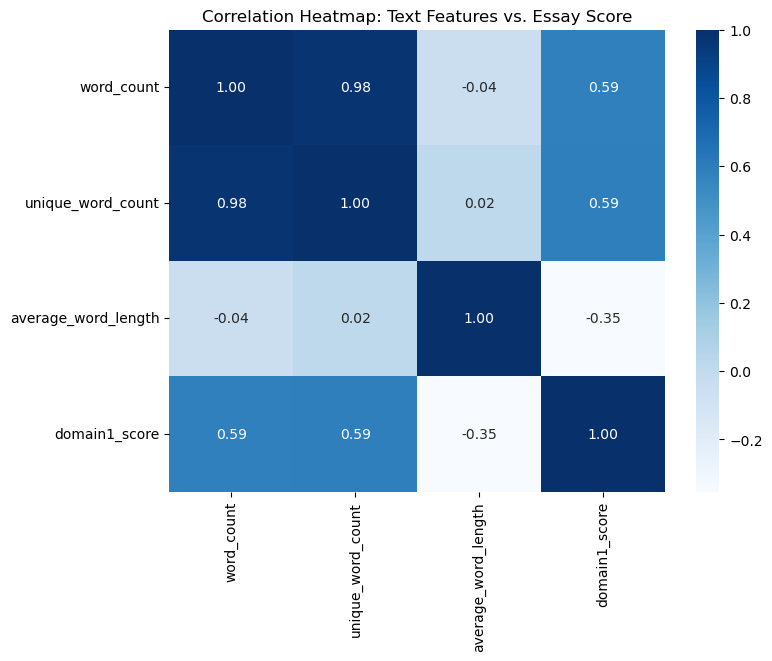

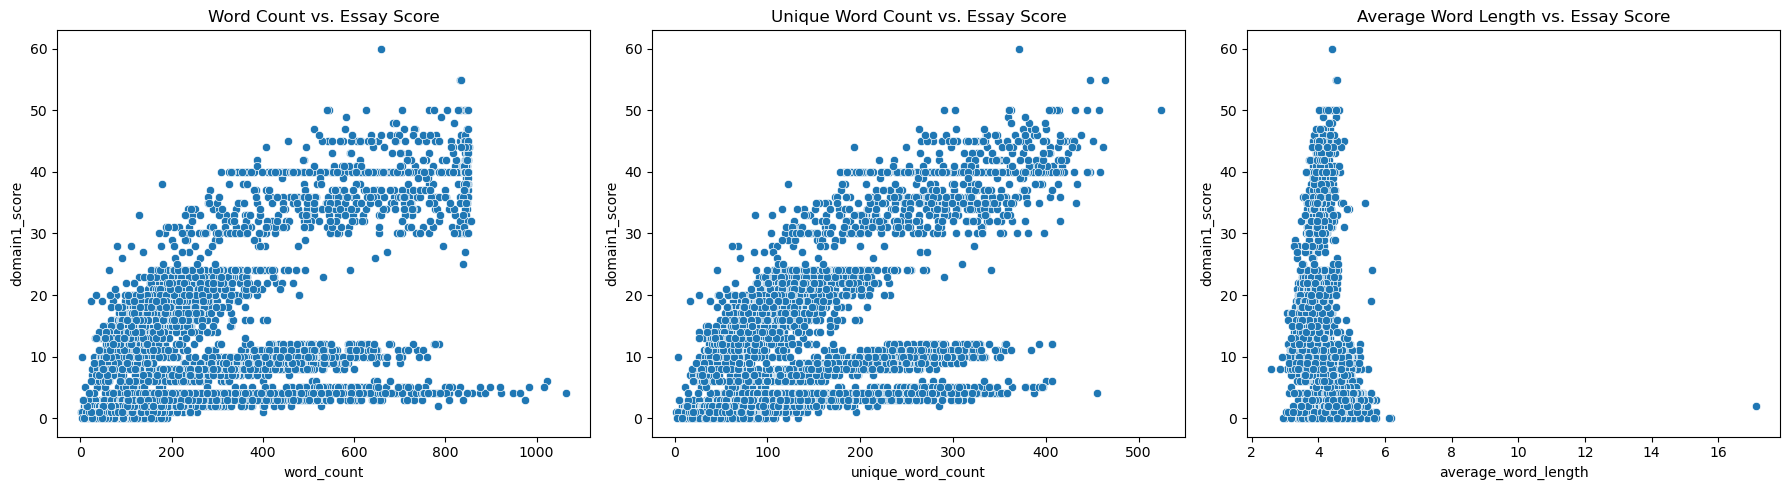

In [12]:
# Calculate correlations between the new text features and essay scores
correlation_matrix_text_features = training_data[['word_count', 'unique_word_count', 'average_word_length', 'domain1_score']].corr()

# Visualize correlations with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_text_features, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap: Text Features vs. Essay Score')
plt.show()

# Additionally, explore linear relationships with scatter plots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='word_count', y='domain1_score', data=training_data)
plt.title('Word Count vs. Essay Score')

plt.subplot(1, 3, 2)
sns.scatterplot(x='unique_word_count', y='domain1_score', data=training_data)
plt.title('Unique Word Count vs. Essay Score')

plt.subplot(1, 3, 3)
sns.scatterplot(x='average_word_length', y='domain1_score', data=training_data)
plt.title('Average Word Length vs. Essay Score')

plt.tight_layout()
plt.show()


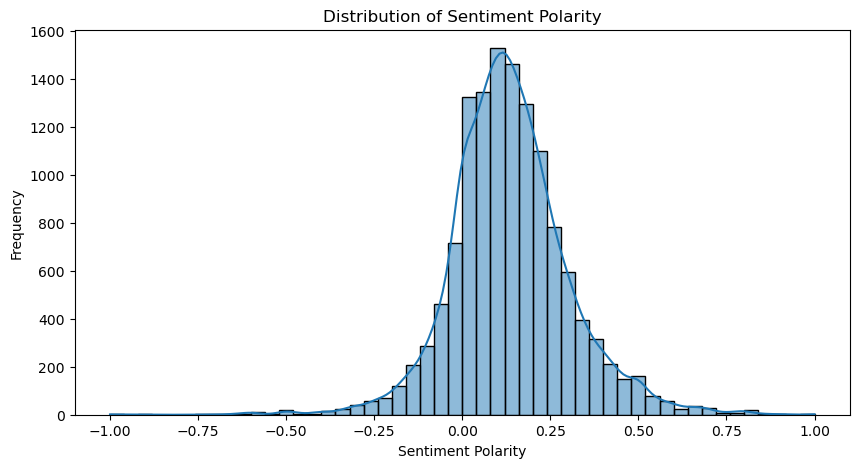

,sentiment_polarity,domain1_score
sentiment_polarity,1.00000,-0.05336
domain1_score,-0.05336,1.00000


In [13]:
from textblob import TextBlob

# Define a function to compute sentiment polarity
def compute_sentiment_polarity(essay):
    return TextBlob(essay).sentiment.polarity

# Apply the function to compute sentiment polarity for each essay
training_data['sentiment_polarity'] = training_data['essay'].apply(compute_sentiment_polarity)

# Visualize the distribution of sentiment polarity
plt.figure(figsize=(10, 5))
sns.histplot(training_data['sentiment_polarity'], bins=50, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Analyze the correlation between sentiment polarity and essay scores
sentiment_score_correlation = training_data[['sentiment_polarity', 'domain1_score']].corr()

sentiment_score_correlation


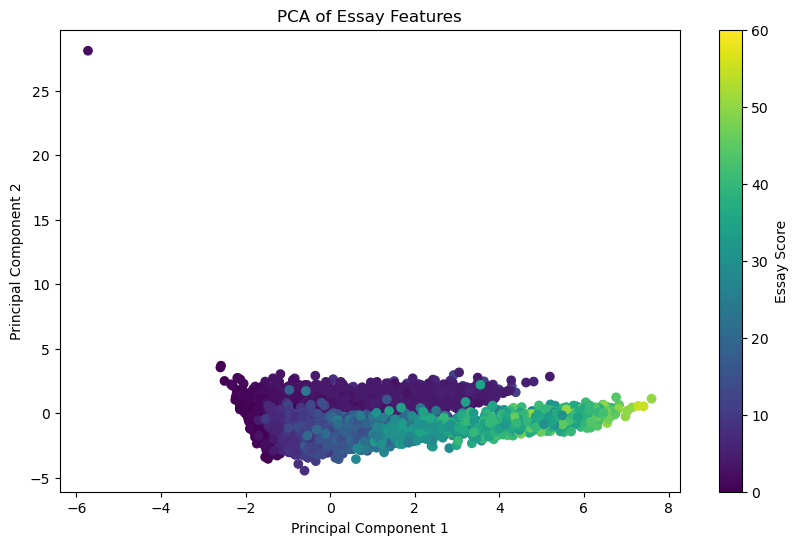

array([0.61929289, 0.28053915])

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting the features for PCA
features = ['word_count', 'unique_word_count', 'average_word_length', 'domain1_score']
X = training_data[features]

# Standardizing the features before applying PCA
X_standardized = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
X_pca = pca.fit_transform(X_standardized)

# Visualizing the results of PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=training_data['domain1_score'], cmap='viridis')
plt.colorbar(label='Essay Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Essay Features')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio


C:\Users\noman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noman\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\noman\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


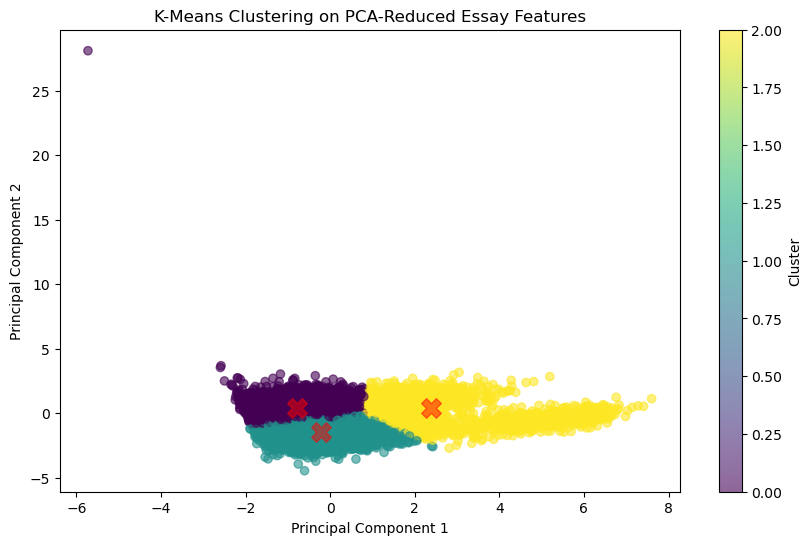

In [15]:
from sklearn.cluster import KMeans

# Applying K-Means clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)  # Using 3 clusters as an initial choice
X_pca_clusters = kmeans.fit_predict(X_pca)

# Visualizing the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca_clusters, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')  # Mark cluster centers
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Essay Features')
plt.show()


In [16]:
# Check the distribution of 'essay_set' for imbalance exploration
essay_set_distribution = training_data['essay_set'].value_counts(normalize=True) * 100

# Display the distribution
essay_set_distribution


essay_set
5    13.908152
2    13.869626
6    13.869626
1    13.738635
4    13.653876
3    13.299430
7    12.089690
8     5.570966
Name: proportion, dtype: float64

In [17]:
import sklearn
print(sklearn.__version__)
#Update scikit-learn if necessary
#!pip install -U scikit-learn


1.3.0


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define binary classes based on 'domain1_score'
threshold = training_data['domain1_score'].median()
training_data['class'] = (training_data['domain1_score'] > threshold).astype(int)

# Feature selection and target variable definition
X = training_data[['word_count', 'unique_word_count', 'average_word_length']]
y = training_data['class']

# Splitting the dataset into training and testing set to apply SMOTE only on training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE to balance the classes in the training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the class distribution after applying SMOTE
class_distribution_smote = pd.Series(y_train_smote).value_counts(normalize=True) * 100

class_distribution_smote


class
1    50.0
0    50.0
Name: proportion, dtype: float64

The median represents the middle value when the scores are sorted in order, effectively dividing the dataset into two equal halves. Half of the essays have scores above this value, and half have scores below.

For each essay, if its domain1_score is greater than the median score (threshold), the essay is classified as 1 (indicating a high score), otherwise 0 (indicating a low score).

The expression (training_data['domain1_score'] > threshold) generates a boolean array (True for scores above the threshold, False for scores below), which is then converted to integers (1 for True, 0 for False) using .astype(int).

In [19]:
from sklearn.model_selection import train_test_split

# Perform a stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the stratification by comparing class distributions
print("Original class distribution:\n", y.value_counts(normalize=True))
print("\nTraining set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set class distribution:\n", y_test.value_counts(normalize=True))


Original class distribution:
 class
0    0.572584
1    0.427416
Name: proportion, dtype: float64

Training set class distribution:
 class
0    0.572626
1    0.427374
Name: proportion, dtype: float64

Test set class distribution:
 class
0    0.572419
1    0.427581
Name: proportion, dtype: float64


In [20]:
# Ensure scikit-learn is installed
# pip install scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize and Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Step 3: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 0.9526194144838213
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1486
           1       0.94      0.95      0.94      1110

    accuracy                           0.95      2596
   macro avg       0.95      0.95      0.95      2596
weighted avg       0.95      0.95      0.95      2596



In [21]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [22]:
# Check the size of the splits
size_train = X_train.shape
size_test = X_test.shape

print("Size of Training Set:", size_train)
print("Size of Testing Set:", size_test)

Size of Training Set: (10382, 3)
Size of Testing Set: (2596, 3)


In [23]:

# Check the distribution of the target in the training and testing sets
#distribution_train = y_train.value_counts(normalize=True)
#distribution_test = y_test.value_counts(normalize=True)

#print("Distribution in Training Set:\n", distribution_train)
#print("\nDistribution in Testing Set:\n", distribution_test)


In [24]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report

# Best hyperparameters from RandomizedSearchCV or GridSearchCV
#best_params = {
    #'n_estimators': 50,
    #'min_samples_split': 10,
    #'min_samples_leaf': 2,
    #'max_depth': None,
    #'bootstrap': True
#}

# Initialize the RandomForestClassifier with the best parameters
#optimized_rf = RandomForestClassifier(
    #n_estimators=best_params['n_estimators'],
    #min_samples_split=best_params['min_samples_split'],
    #min_samples_leaf=best_params['min_samples_leaf'],
    #max_depth=best_params['max_depth'],
    #bootstrap=best_params['bootstrap'],
    #random_state=42  # Ensure reproducibility
#)

# Fit the model on your balanced training data
#optimized_rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
#y_pred_optimized = optimized_rf.predict(X_test)

# Calculate and print the accuracy
#accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
#print("Accuracy of the optimized model on Test Set:", accuracy_optimized)

# Print the classification report
#classification_report_optimized = classification_report(y_test, y_pred_optimized)
#print("Classification Report of the optimized model:\n", classification_report_optimized)

In [25]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting Classifier
#gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on your balanced training data
#gbc.fit(X_train_smote, y_train_smote)

# Predict on the test set
#y_pred_gbc = gbc.predict(X_test)

# Calculate and print the accuracy
#accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
#print("Accuracy of the Gradient Boosting model on Test Set:", accuracy_gbc)

# Print the classification report
#print("Classification Report of the Gradient Boosting model:\n", classification_report(y_test, y_pred_gbc))


In [26]:
# !pip install xgboost


In [27]:
#import pandas as pd

# Assuming 'training_data' is your DataFrame and it contains 'domain1_score' and 'domain2_score' columns
#correlation = training_data[['domain1_score', 'domain2_score']].corr()

# Print the correlation matrix
#print(correlation)

# weak relationship between domain1_score and domain2_score, also the relathionship is negative meaning that when domain_1score rise,domaine_2score decrease.


In [28]:
#from sklearn.model_selection import train_test_split

# Perform a stratified split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the stratification by comparing class distributions
#print("Original class distribution:\n", y.value_counts(normalize=True))
#print("\nTraining set class distribution:\n", y_train.value_counts(normalize=True))
#print("\nTest set class distribution:\n", y_test.value_counts(normalize=True))


In [29]:
#!pip install nltk spacy textstat
#!python -m spacy download en_core_web_sm


In [30]:
#import nltk
#import spacy
#import textstat
#from nltk.tokenize import word_tokenize
#nltk.download('punkt')

#nlp = spacy.load("en_core_web_sm")


In [31]:
def calculate_text_complexity_features(text):
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    num_words = len(word_tokenize(text))
    unique_words = len(set(word_tokenize(text)))
    average_word_length = sum(len(word) for word in word_tokenize(text)) / num_words
    readability_score = textstat.flesch_reading_ease(text)
    
    # Syntactic complexity measures might include average sentence length, etc.
    average_sentence_length = num_words / num_sentences
    
    # Return a dictionary of features
    return {
        "num_sentences": num_sentences,
        "num_words": num_words,
        "unique_words": unique_words,
        "average_word_length": average_word_length,
        "readability_score": readability_score,
        "average_sentence_length": average_sentence_length
    }


In [32]:
from textstat.textstat import textstat

# function application for readability scores
readability_functions = [
    textstat.flesch_reading_ease,
    textstat.gunning_fog,
    textstat.automated_readability_index,
    textstat.smog_index,
    textstat.flesch_kincaid_grade,
    textstat.coleman_liau_index,
    textstat.dale_chall_readability_score
]

for func in readability_functions:
    feature_name = func.__name__
    training_data[feature_name] = training_data['essay'].apply(func)


In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Step 3: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 0.9526194144838213
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1486
           1       0.94      0.95      0.94      1110

    accuracy                           0.95      2596
   macro avg       0.95      0.95      0.95      2596
weighted avg       0.95      0.95      0.95      2596



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


X = training_data['essay']
y = training_data['class']

# Vectorizing text features
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

# Balancing the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Training a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9098613251155624
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1486
           1       0.91      0.88      0.89      1110

    accuracy                           0.91      2596
   macro avg       0.91      0.91      0.91      2596
weighted avg       0.91      0.91      0.91      2596

